In [1]:
from src.Generator import Generator
from src.Discriminator import Discriminator
from src.utils.tools import * 
from src.data.GenLoaders import *
from src.data.format_converter import data_converter
from src.training.trainer import *
import torch
from collections import Counter
torch.manual_seed(0); # Set for testing purposes, please do not change!

In [2]:
save_dir = 'data/'
data_converter(save_dir='data/', file_name="stamp_dataset_28.pkl" , label_as_strings=False, binarize_labels=True)
#dataloader=get_SNsLoader(save_dir,batch_size=32,file_name="td_ztf_stamp_17_06_20.pkl",label_as_strings=False,cut_around_center=True)

In [3]:
save_dir = 'data/'
#Carga de datos
with open(save_dir + "converted_binaryTrue_stamp_dataset_28.pkl", "rb") as f:
    data = pk.load(f)


print(data.keys())
#Separacion de los datos
Train_dict = data['Train']
Validation_dict = data['Validation']
Test_dict = data['Test']

train_images = Train_dict['images']
validation_images = Validation_dict['images']
test_images = Test_dict['images']

labels_train = Train_dict['labels']
labels_val = Validation_dict['labels']
labels_test = Test_dict['labels']


dict_keys(['Train', 'Validation', 'Test'])


Counter({0.0: 49198, 1.0: 1396})
Epoch 1/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


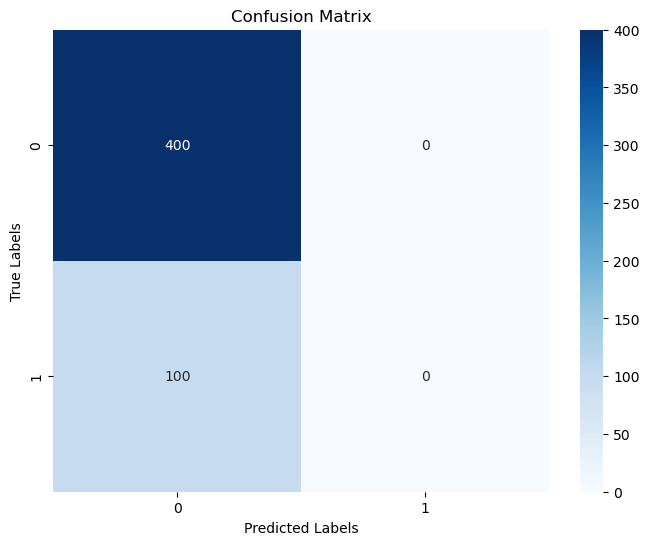

Val loss: 1.1070219725370407, Val acc: 0.8
Epoch 2/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.1039089486002922, Val acc: 0.8
Epoch 3/300
Val loss: 1.1049294136464596, Val acc: 0.8
Epoch 4/300
Val loss: 1.1048649027943611, Val acc: 0.8
Epoch 5/300
Val loss: 1.1048481166362762, Val acc: 0.8
Epoch 6/300
Val loss: 1.1036664731800556, Val acc: 0.8
Epoch 7/300
Val loss: 1.102492030709982, Val acc: 0.8
Epoch 8/300
Val loss: 1.1036620363593102, Val acc: 0.8
Epoch 9/300
Val loss: 1.103661172091961, Val acc: 0.8
Epoch 10/300
Val loss: 1.106004599481821, Val acc: 0.8
Epoch 11/300
Val loss: 1.1071763299405575, Val acc: 0.8
Epoch 12/300
Val loss: 1.1060044169425964, Val acc: 0.8
Epoch 13/300
Val loss: 1.1048325523734093, Val acc: 0.8
Epoch 14/300
Val loss: 1.1036606803536415, Val acc: 0.8
Epoch 15/300
Val loss: 1.103660672903061, Val acc: 0.8
Epoch 16/300
Val loss: 1.1036606803536415, Val acc: 0.8
Epoch 17/300
Val loss: 1.1013169065117836, Val acc: 0.8
Epoch 18/300
Val loss: 1.104832574725151, Val acc: 0.8
Epoch 19/300
Val loss: 1.1071763038635254, Val acc: 0.8
Epoch 20/300
Val 

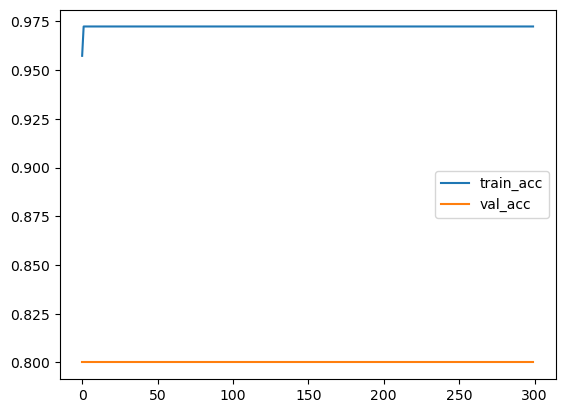

In [4]:
epochs=300
train_loader,val_loader=get_training_loaders(batch_size=32,file_name="converted_binaryTrue_stamp_dataset_28.pkl",label_as_strings=False)
labels = train_loader.dataset.labels

# Assuming labels is a list or array containing your class labels
class_counts = Counter(labels)

# class_counts will be a dictionary where keys are class labels, and values are counts
print(class_counts)

#Training
curves=trainer(train_loader,val_loader,epochs=epochs,dir_name="binary_28")

In [5]:
device = 'cuda'
z_dim = 64

num_img=5000
gen_1 = Generator(z_dim).to(device)
gen_1.load_state_dict(torch.load('dcgan28'))
gen = Generator(z_dim).to(device)
gen.load_state_dict(torch.load('wgangp28'))
fake_noise = get_noise(num_img, z_dim, device=device)
fake_dcgan = gen_1(fake_noise)
fake_wgangp= gen(fake_noise)

tensor([49198,  6396])
Epoch 1/300


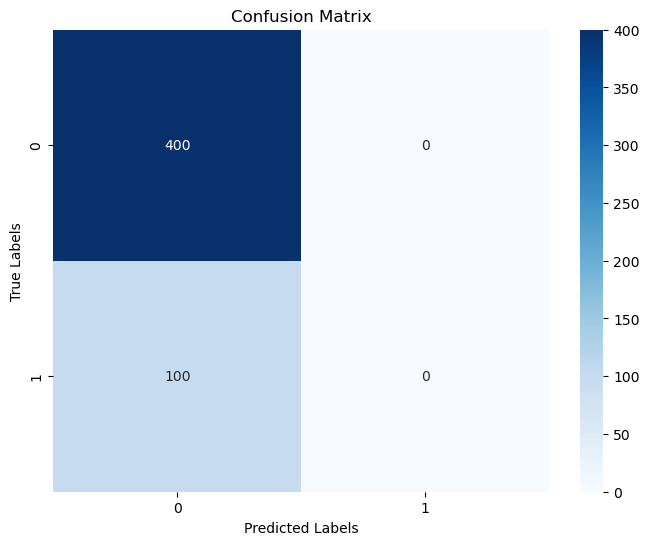

Val loss: 1.1028134115040302, Val acc: 0.8
Epoch 2/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.101364091038704, Val acc: 0.8
Epoch 3/300
Val loss: 1.1083929240703583, Val acc: 0.8
Epoch 4/300
Val loss: 1.1072148233652115, Val acc: 0.8
Epoch 5/300
Val loss: 1.1001477465033531, Val acc: 0.8
Epoch 6/300
Val loss: 1.102489434182644, Val acc: 0.8
Epoch 7/300
Val loss: 1.1083488166332245, Val acc: 0.8
Epoch 8/300
Val loss: 1.1048325672745705, Val acc: 0.8
Epoch 9/300
Val loss: 1.1024888008832932, Val acc: 0.8
Epoch 10/300
Val loss: 1.1071764156222343, Val acc: 0.8
Epoch 11/300
Val loss: 1.1001450680196285, Val acc: 0.8
Epoch 12/300
Val loss: 1.1024888195097446, Val acc: 0.8
Epoch 13/300
Val loss: 1.103660687804222, Val acc: 0.8
Epoch 14/300
Val loss: 1.1036606803536415, Val acc: 0.8
Epoch 15/300
Val loss: 1.103660687804222, Val acc: 0.8
Epoch 16/300
Val loss: 1.107176348567009, Val acc: 0.8
Epoch 17/300
Val loss: 1.103660687804222, Val acc: 0.8
Epoch 18/300
Val loss: 1.104832574725151, Val acc: 0.8
Epoch 19/300
Val loss: 1.1001450456678867, Val acc: 0.8
Epoch 20/300
Val lo

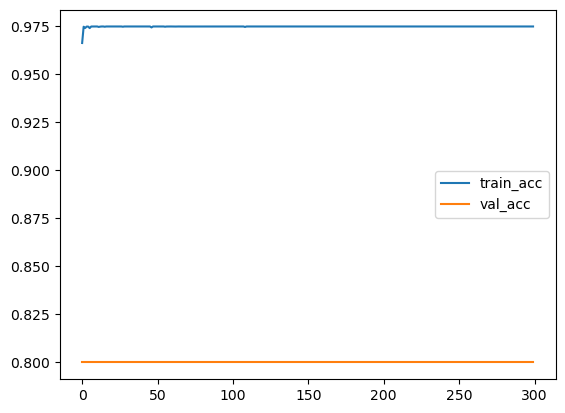

In [6]:
train_loader,val_loader=get_training_loaders(synthetic_SN=fake_dcgan.detach().cpu(),batch_size=32,file_name="converted_binaryTrue_stamp_dataset_28.pkl",label_as_strings=False,with_labels=True)
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
curves=trainer(train_loader,val_loader,epochs=epochs)

tensor([49198,  6396])
Epoch 1/300


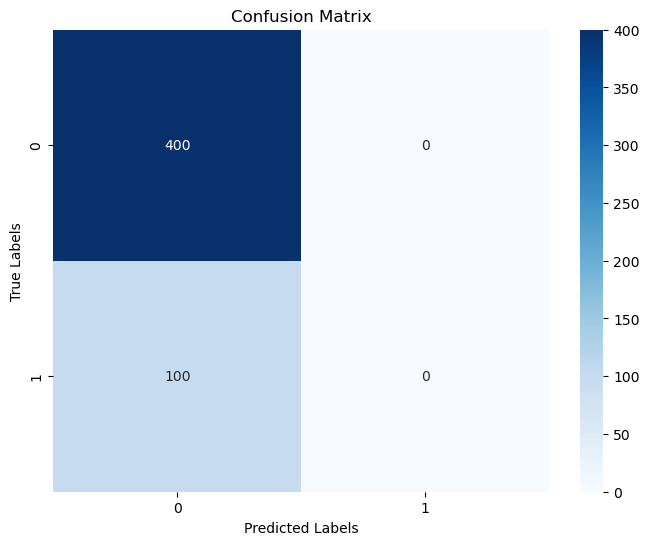

Val loss: 1.107699915766716, Val acc: 0.8
Epoch 2/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.101409424096346, Val acc: 0.8
Epoch 3/300
Val loss: 1.102519553154707, Val acc: 0.8
Epoch 4/300
Val loss: 1.102499432861805, Val acc: 0.8
Epoch 5/300
Val loss: 1.1036639288067818, Val acc: 0.8
Epoch 6/300
Val loss: 1.1060054413974285, Val acc: 0.8
Epoch 7/300
Val loss: 1.1060047037899494, Val acc: 0.8
Epoch 8/300
Val loss: 1.1036608070135117, Val acc: 0.8
Epoch 9/300
Val loss: 1.1071763634681702, Val acc: 0.8
Epoch 10/300
Val loss: 1.1036606803536415, Val acc: 0.8
Epoch 11/300
Val loss: 1.1071763634681702, Val acc: 0.8
Epoch 12/300
Val loss: 1.1036607176065445, Val acc: 0.8
Epoch 13/300
Val loss: 1.103660687804222, Val acc: 0.8
Epoch 14/300
Val loss: 1.1095200888812542, Val acc: 0.8
Epoch 15/300
Val loss: 1.1060044318437576, Val acc: 0.8
Epoch 16/300
Val loss: 1.1060044541954994, Val acc: 0.8
Epoch 17/300
Val loss: 1.104832537472248, Val acc: 0.8
Epoch 18/300
Val loss: 1.1060044430196285, Val acc: 0.8
Epoch 19/300
Val loss: 1.1048325523734093, Val acc: 0.8
Epoch 20/300
Val 

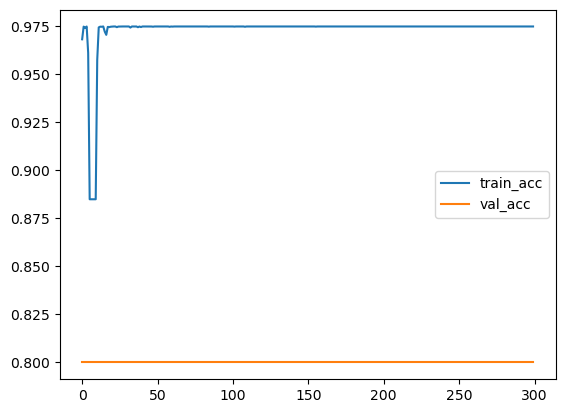

In [7]:
train_loader,val_loader=get_training_loaders(synthetic_SN=fake_wgangp.detach().cpu(),batch_size=32,file_name="converted_binaryTrue_stamp_dataset_28.pkl",label_as_strings=False,with_labels=True)
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
curves=trainer(train_loader,val_loader,epochs=epochs)

In [8]:
num_img=10000
gen_1 = Generator(z_dim).to(device)
gen_1.load_state_dict(torch.load('dcgan28'))
gen = Generator(z_dim).to(device)
gen.load_state_dict(torch.load('wgangp28'))
fake_noise = get_noise(num_img, z_dim, device=device)
fake_dcgan = gen_1(fake_noise)
fake_wgangp= gen(fake_noise)

tensor([49198, 11396])
Epoch 1/300


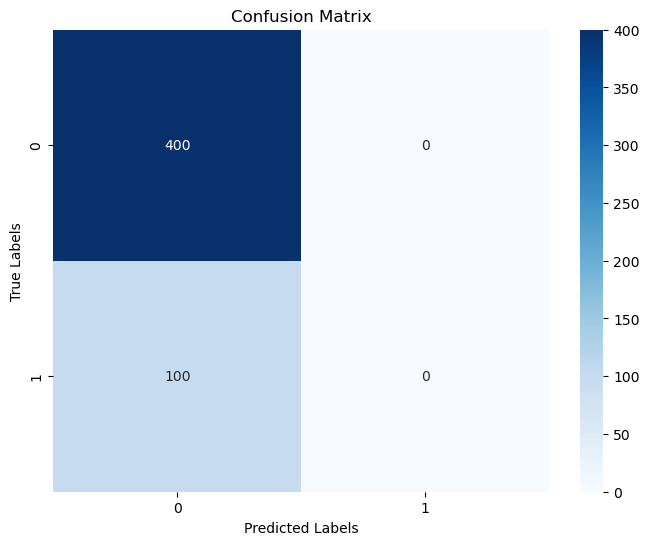

Val loss: 1.1053252816200256, Val acc: 0.8
Epoch 2/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.1060981154441833, Val acc: 0.8
Epoch 3/300
Val loss: 1.101334072649479, Val acc: 0.8
Epoch 4/300
Val loss: 1.1060064062476158, Val acc: 0.8
Epoch 5/300
Val loss: 1.1060074009001255, Val acc: 0.8
Epoch 6/300
Val loss: 1.1024895906448364, Val acc: 0.8
Epoch 7/300
Val loss: 1.1024888008832932, Val acc: 0.8
Epoch 8/300
Val loss: 1.105006318539381, Val acc: 0.8
Epoch 9/300
Val loss: 1.1071763038635254, Val acc: 0.8
Epoch 10/300
Val loss: 1.1071763336658478, Val acc: 0.8
Epoch 11/300
Val loss: 1.1036606580018997, Val acc: 0.8
Epoch 12/300
Val loss: 1.1024887934327126, Val acc: 0.8
Epoch 13/300
Val loss: 1.1024888046085835, Val acc: 0.8
Epoch 14/300
Val loss: 1.1083481758832932, Val acc: 0.8
Epoch 15/300
Val loss: 1.1048325821757317, Val acc: 0.8
Epoch 16/300
Val loss: 1.1036606803536415, Val acc: 0.8
Epoch 17/300
Val loss: 1.1048325598239899, Val acc: 0.8
Epoch 18/300
Val loss: 1.1036606840789318, Val acc: 0.8
Epoch 19/300
Val loss: 1.1083482056856155, Val acc: 0.8
Epoch 20/300
V

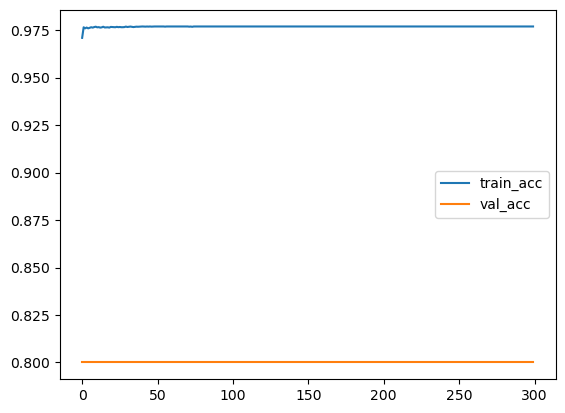

In [9]:
train_loader,val_loader=get_training_loaders(synthetic_SN=fake_dcgan.detach().cpu(),batch_size=32,file_name="converted_binaryTrue_stamp_dataset_28.pkl",label_as_strings=False,with_labels=True)
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
curves=trainer(train_loader,val_loader,epochs=epochs)

tensor([49198, 11396])
Epoch 1/300


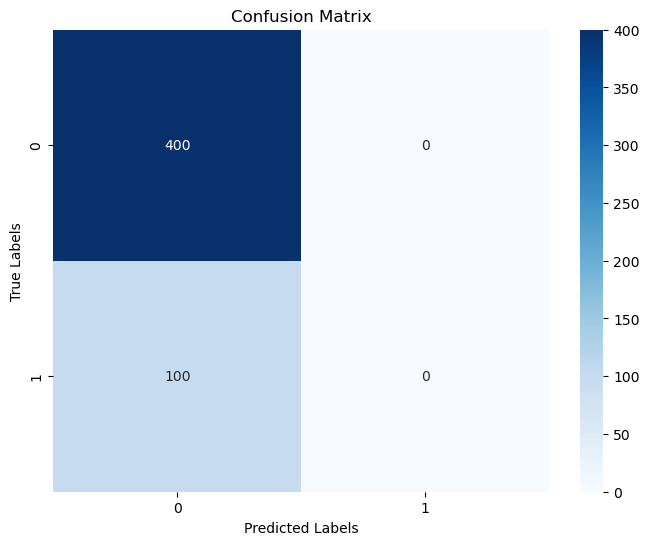

Val loss: 1.100565392524004, Val acc: 0.8
Epoch 2/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.1025708392262459, Val acc: 0.8
Epoch 3/300
Val loss: 1.1048541218042374, Val acc: 0.8
Epoch 4/300
Val loss: 1.1036659367382526, Val acc: 0.8
Epoch 5/300
Val loss: 1.104833472520113, Val acc: 0.8
Epoch 6/300
Val loss: 1.1060046032071114, Val acc: 0.8
Epoch 7/300
Val loss: 1.1024888344109058, Val acc: 0.8
Epoch 8/300
Val loss: 1.1024887934327126, Val acc: 0.8
Epoch 9/300
Val loss: 1.1036606803536415, Val acc: 0.8
Epoch 10/300
Val loss: 1.1083481758832932, Val acc: 0.8
Epoch 11/300
Val loss: 1.1095200702548027, Val acc: 0.8
Epoch 12/300
Val loss: 1.1060044392943382, Val acc: 0.8
Epoch 13/300
Val loss: 1.1048325598239899, Val acc: 0.8
Epoch 14/300
Val loss: 1.1060044541954994, Val acc: 0.8
Epoch 15/300
Val loss: 1.1071763262152672, Val acc: 0.8
Epoch 16/300
Val loss: 1.1024887934327126, Val acc: 0.8
Epoch 17/300
Val loss: 1.1048325598239899, Val acc: 0.8
Epoch 18/300
Val loss: 1.1036606952548027, Val acc: 0.8
Epoch 19/300
Val loss: 1.1024887971580029, Val acc: 0.8
Epoch 20/300


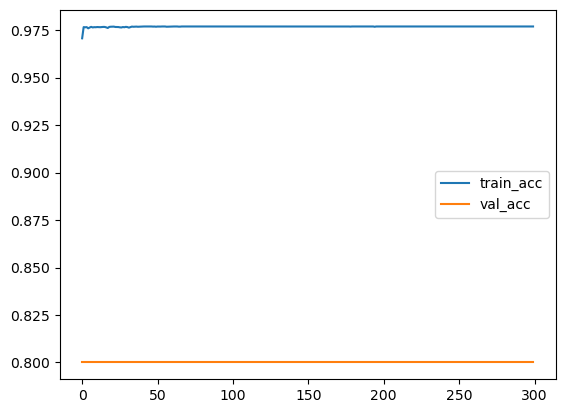

In [10]:
train_loader,val_loader=get_training_loaders(synthetic_SN=fake_dcgan.detach().cpu(),batch_size=32,file_name="converted_binaryTrue_stamp_dataset_28.pkl",label_as_strings=False,with_labels=True)
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
curves=trainer(train_loader,val_loader,epochs=epochs)

In [11]:
num_img=20000
gen_1 = Generator(z_dim).to(device)
gen_1.load_state_dict(torch.load('dcgan28'))
gen = Generator(z_dim).to(device)
gen.load_state_dict(torch.load('wgangp28'))
fake_noise = get_noise(num_img, z_dim, device=device)
fake_dcgan = gen_1(fake_noise)
fake_wgangp= gen(fake_noise)

tensor([49198, 21396])
Epoch 1/300


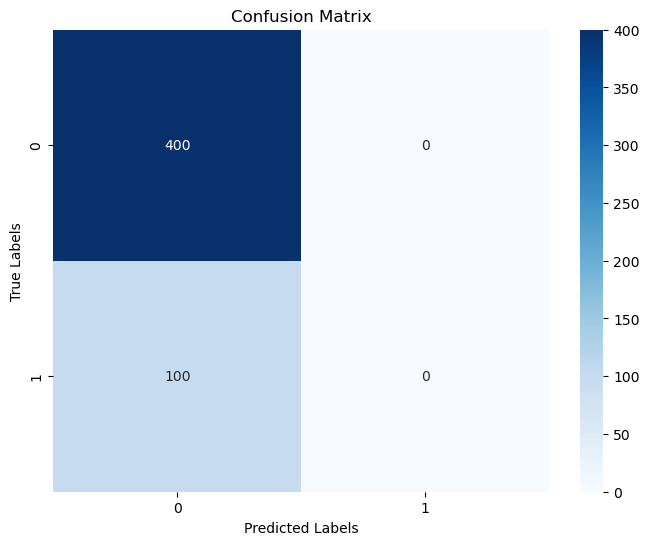

Val loss: 1.1049777641892433, Val acc: 0.8
Epoch 2/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.1060202047228813, Val acc: 0.8
Epoch 3/300
Val loss: 1.109535202383995, Val acc: 0.8
Epoch 4/300
Val loss: 1.1013173125684261, Val acc: 0.8
Epoch 5/300
Val loss: 1.1060044802725315, Val acc: 0.8
Epoch 6/300
Val loss: 1.1071763262152672, Val acc: 0.8
Epoch 7/300
Val loss: 1.1024888157844543, Val acc: 0.8
Epoch 8/300
Val loss: 1.7059106677770615, Val acc: 0.2
Epoch 9/300
Val loss: 1.1036606803536415, Val acc: 0.8
Epoch 10/300
Val loss: 1.1071763299405575, Val acc: 0.8
Epoch 11/300
Val loss: 1.7035171017050743, Val acc: 0.2
Epoch 12/300
Val loss: 1.704831600189209, Val acc: 0.2
Epoch 13/300
Val loss: 1.104832585901022, Val acc: 0.8
Epoch 14/300
Val loss: 1.2822252064943314, Val acc: 0.748
Epoch 15/300
Val loss: 1.1036606654524803, Val acc: 0.8
Epoch 16/300
Val loss: 1.1036607027053833, Val acc: 0.8
Epoch 17/300
Val loss: 1.7035705521702766, Val acc: 0.2
Epoch 18/300
Val loss: 1.1071763038635254, Val acc: 0.8
Epoch 19/300
Val loss: 1.6911652609705925, Val acc: 0.2
Epoch 20/300


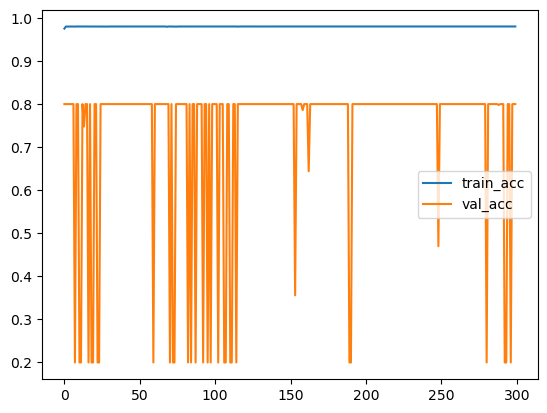

In [12]:
train_loader,val_loader=get_training_loaders(synthetic_SN=fake_dcgan.detach().cpu(),batch_size=32,file_name="converted_binaryTrue_stamp_dataset_28.pkl",label_as_strings=False,with_labels=True)
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
curves=trainer(train_loader,val_loader,epochs=epochs)

tensor([49198, 21396])
Epoch 1/300


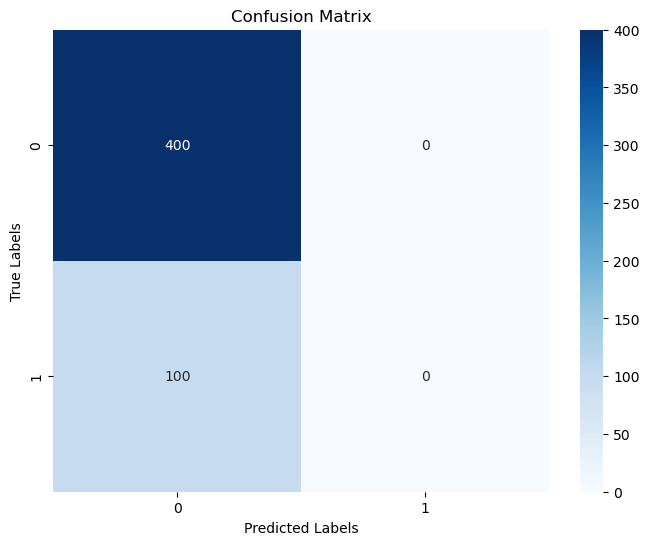

Val loss: 1.1039341166615486, Val acc: 0.8
Epoch 2/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.1071882359683514, Val acc: 0.8
Epoch 3/300
Val loss: 1.1036618612706661, Val acc: 0.8
Epoch 4/300
Val loss: 1.111863873898983, Val acc: 0.8
Epoch 5/300
Val loss: 1.1048338040709496, Val acc: 0.8
Epoch 6/300
Val loss: 1.1013169214129448, Val acc: 0.8
Epoch 7/300
Val loss: 1.678079053759575, Val acc: 0.2
Epoch 8/300
Val loss: 1.104832574725151, Val acc: 0.8
Epoch 9/300
Val loss: 1.703292392194271, Val acc: 0.2
Epoch 10/300
Val loss: 1.1060044318437576, Val acc: 0.8
Epoch 11/300
Val loss: 1.106004424393177, Val acc: 0.8
Epoch 12/300
Val loss: 1.106004424393177, Val acc: 0.8
Epoch 13/300
Val loss: 1.1108169704675674, Val acc: 0.8
Epoch 14/300
Val loss: 1.107176311314106, Val acc: 0.8
Epoch 15/300
Val loss: 1.1095200702548027, Val acc: 0.8
Epoch 16/300
Val loss: 1.1048325821757317, Val acc: 0.8
Epoch 17/300
Val loss: 1.1071763262152672, Val acc: 0.8
Epoch 18/300
Val loss: 1.1060044318437576, Val acc: 0.8
Epoch 19/300
Val loss: 1.106004424393177, Val acc: 0.8
Epoch 20/300
Val los

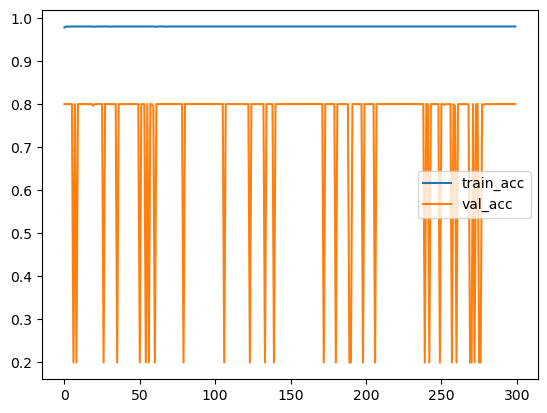

In [13]:
train_loader,val_loader=get_training_loaders(synthetic_SN=fake_dcgan.detach().cpu(),batch_size=32,file_name="converted_binaryTrue_stamp_dataset_28.pkl",label_as_strings=False,with_labels=True)
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
curves=trainer(train_loader,val_loader,epochs=epochs)

In [15]:
num_img=30000
gen_1 = Generator(z_dim).to(device)
gen_1.load_state_dict(torch.load('dcgan28'))
gen = Generator(z_dim).to(device)
gen.load_state_dict(torch.load('wgangp28'))
fake_noise = get_noise(num_img, z_dim, device=device)
fake_dcgan = gen_1(fake_noise)
fake_wgangp= gen(fake_noise) 

KeyboardInterrupt: 

In [22]:
#open pickle file

with open("generated_dataset_50000_modelwgangp28.pkl", 'rb') as f:
    data = pk.load(f)
    

In [23]:
data

{'images': [array([[[-0.4162312 , -0.40613946, -0.39418447, ..., -0.50693005,
           -0.46894473, -0.46825108],
          [-0.38623986, -0.47275573, -0.40629804, ..., -0.5364828 ,
           -0.48810613, -0.49291456],
          [-0.37748435, -0.3157476 , -0.28596485, ..., -0.4949445 ,
           -0.49386376, -0.5039375 ],
          ...,
          [-0.4668366 , -0.5681459 , -0.5137579 , ..., -0.253135  ,
           -0.20749201, -0.28899866],
          [-0.5249119 , -0.5035564 , -0.5182327 , ..., -0.397968  ,
           -0.21326649, -0.47396696],
          [-0.4997102 , -0.5168241 , -0.51184815, ..., -0.5119006 ,
           -0.39918807, -0.47858104]],
  
         [[-0.5824506 , -0.6144591 , -0.5780704 , ..., -0.64436007,
           -0.59032214, -0.600531  ],
          [-0.5654949 , -0.59649277, -0.6365477 , ..., -0.6411414 ,
           -0.62325144, -0.6081476 ],
          [-0.56808215, -0.6238459 , -0.58867204, ..., -0.67847776,
           -0.6191018 , -0.59909517],
          ...,
  